OBJ:
* Demo smooth pipeline for complete ML model.

In [1]:
import pandas as pd
import numpy as np

## Load data

In [2]:
from src.data.io import import_and_prep_target_df_from_pickle, import_and_merge_feature_dfs_from_pickles

In [3]:
df = import_and_prep_target_df_from_pickle('./../../../data/interim/D3_dailyTS/EDdaily_occupancy_classRollQ90_clipped.pkl')

df.head()

,flag_target,EDMeanOcc_prevday
dt_date,,
2011-09-01,0,NaN
2011-09-02,0,28.000000
2011-09-03,0,36.833333
2011-09-04,0,29.291667
2011-09-05,0,36.833333


In [4]:
df.shape

(2587, 2)

In [5]:
pickle_features_list = ['callender.pkl', 'EDmorn.pkl', 'IPmorn.pkl', 'IPprevday_summary.pkl', 'EDprevday_summary.pkl']
df2 = import_and_merge_feature_dfs_from_pickles('./../../../data/interim/D3_dailyTS/', pickle_features_list, df)
df2.head()

,flag_target,EDMeanOcc_prevday,year,month,holiday,christmas_period,week_sin,week_cos,year_sin,year_cos,...,IPDAILYno_patients_nonelec,IPDAILYno_patients_elec,IPDAILYno_patients_daycase,IPDAILYage_mean_elecnonelec,IPDAILYno_age_75plus_elecnonelec,EDDAILYno_attendances,EDDAILYno_admissions,EDDAILYage_mean,EDDAILYno_age_75plus,EDDAILYno_attendances_ambulance
dt_date,,,,,,,,,,,,,,,,,,,,,
2011-09-01,0,NaN,2011,9,0,0,0.000000,1.000000,0.000000,1.000000,...,898,221,203,63.4048,443,193,83,46.7513,32,68
2011-09-02,0,28.000000,2011,9,0,0,0.781831,0.623490,0.017213,0.999852,...,901,238,221,63.5031,446,213,99,48.6761,35,89
2011-09-03,0,36.833333,2011,9,0,0,0.974928,-0.222521,0.034422,0.999407,...,892,227,182,63.3021,437,215,100,49.107,40,91
2011-09-04,0,29.291667,2011,9,0,0,0.433884,-0.900969,0.051620,0.998667,...,859,176,53,63.9923,418,251,124,47.8247,43,114
2011-09-05,0,36.833333,2011,9,0,0,-0.433884,-0.900969,0.068802,0.997630,...,852,161,38,64.2655,415,273,114,47.4908,44,107


In [6]:
for i in df2:
    print(i)

flag_target
EDMeanOcc_prevday
year
month
holiday
christmas_period
week_sin
week_cos
year_sin
year_cos
EDMORNoccupancy
EDMORNage_mean
EDMORNocc_age_75plus
EDMORNocc_ambulance
EDMORNocc_majors
EDMORNocc_minors
EDMORNocc_resus
EDMORNocc_mmrother
EDMORNwait_time_mean
EDMORNwait_time_std
EDMORNwait_time_skew
IPMORNocc_patients_total
IPMORNocc_patients_nonelec
IPMORNocc_patients_elec
IPMORNocc_patients_daycase
IPMORNage_mean_elecnonelec
IPMORNocc_age_75plus_elecnonelec
IPMORNocc_patients_elecnonelec_gp
IPMORNocc_patients_elecnonelec_ed
IPMORNcurrent_los_mean
IPMORNcurrent_los_std
IPMORNcurrent_los_skew
IPDAILYno_patients_total
IPDAILYno_patients_nonelec
IPDAILYno_patients_elec
IPDAILYno_patients_daycase
IPDAILYage_mean_elecnonelec
IPDAILYno_age_75plus_elecnonelec
EDDAILYno_attendances
EDDAILYno_admissions
EDDAILYage_mean
EDDAILYno_age_75plus
EDDAILYno_attendances_ambulance


Create some proportional features

In [7]:

df2['EDMORNprop_ambulance'] = df2.EDMORNocc_ambulance/df2.EDMORNoccupancy
df2['EDMORNprop_major_resus'] = (df2.EDMORNocc_resus + df2.EDMORNocc_majors)/df2.EDMORNoccupancy
df2['EDMORNprop_mmr_missing'] = df2.EDMORNocc_mmrother/df2.EDMORNoccupancy
df2['EDMORNprop_age_75plus'] = df2.EDMORNocc_age_75plus/df2.EDMORNoccupancy

df2['IPMORNocc_patients_elecnonelec'] = df2.IPMORNocc_patients_nonelec + df2.IPMORNocc_patients_elec
df2['IPMORNprop_patients_nonelec'] = df2.IPMORNocc_patients_nonelec/df2.IPMORNocc_patients_elecnonelec
df2['IPMORNprop_patients_elecnonelec75plus'] = df2.IPMORNocc_age_75plus_elecnonelec/df2.IPMORNocc_patients_elecnonelec
df2['IPMORNprop_patients_elecnonelec_gp'] = df2.IPMORNocc_patients_elecnonelec_gp/df2.IPMORNocc_patients_elecnonelec # poss should be only nonelec
df2['IPMORNprop_patients_elecnonelec_ed'] = df2.IPMORNocc_patients_elecnonelec_ed/df2.IPMORNocc_patients_elecnonelec


Remove some features

In [8]:
list_to_drop = ['holiday',
                'month',
                
                'EDMORNage_mean', # we have 75 plus prop in
                'EDMORNocc_age_75plus',
                'EDMORNocc_ambulance',
                'EDMORNocc_majors',
                'EDMORNocc_minors',
                'EDMORNocc_resus',
                'EDMORNocc_mmrother',
                
                'IPMORNocc_patients_nonelec',
                'IPMORNocc_patients_elec',
                'IPMORNocc_age_75plus_elecnonelec',
                'IPMORNage_mean_elecnonelec',
                'IPMORNocc_patients_elecnonelec_gp',
                'IPMORNocc_patients_elecnonelec_ed',
                
#                 'IPMORNcurrent_los_skew',
#                 'IPMORNocc_patients_elecnonelec_ed',
#                 'IPMORNocc_patients_elecnonelec_gp',
                
#                 'IPDAILYno_patients_elec'
                
#                'EDDAILYno_attendances_ambulance',
                
                ]

df2 = df2.drop(list_to_drop,axis=1)

## Split data

In [9]:
from src.data.preprocess import make_timeseries_test_train_splits
X_train, X_test, y_train, y_test = make_timeseries_test_train_splits(df2, 'flag_target', 365)

DATA POINTS:
orig size 2587
training:  2222
testing:  365


## Prepare data

In [10]:
# version 19.2
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from src.data.preprocess import DataFrameSelector, DataFrameReform, MakeBooleanAnInteger

In [11]:
X_train.head(2)

,EDMeanOcc_prevday,year,christmas_period,week_sin,week_cos,year_sin,year_cos,EDMORNoccupancy,EDMORNwait_time_mean,EDMORNwait_time_std,...,EDDAILYno_attendances_ambulance,EDMORNprop_ambulance,EDMORNprop_major_resus,EDMORNprop_mmr_missing,EDMORNprop_age_75plus,IPMORNocc_patients_elecnonelec,IPMORNprop_patients_nonelec,IPMORNprop_patients_elecnonelec75plus,IPMORNprop_patients_elecnonelec_gp,IPMORNprop_patients_elecnonelec_ed
dt_date,,,,,,,,,,,,,,,,,,,,,
2011-09-01,NaN,2011,0,0.000000,1.00000,0.000000,1.000000,13,198,138,...,68,0.538462,0.846154,0,0.230769,963,0.80893,0.420561,0.159917,0.404984
2011-09-02,28.0,2011,0,0.781831,0.62349,0.017213,0.999852,7,375,235,...,89,1,1,0,0.142857,990,0.79798,0.40202,0.159596,0.392929


In [12]:

bin_features = ['christmas_period']
num_features = list(set(X_train.columns) - set(bin_features))
all_features = num_features + bin_features

In [13]:
#### make numerical and binary pipelines
num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_features)),
#     ('feature_filter',SelectKBest(f_classif,k='all')),
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler()),
])

bin_pipeline = Pipeline([
    ('selector',DataFrameSelector(bin_features)),
    ('boolean_conversion',MakeBooleanAnInteger()),
    ('imputer',SimpleImputer(strategy='most_frequent')),
])


pipes_type_list = [
    ('num_pipeline',num_pipeline),
  ('bin_pipeline',bin_pipeline),
]


#### define all parts of preprocessing in pipeline
preprocess_pipeline = make_pipeline(
    FeatureUnion(transformer_list=pipes_type_list),
    DataFrameReform(all_features)
)

#### call pipeline
X_trainT = preprocess_pipeline.fit_transform(X_train,y_train)
X_trainT.head()

,IPMORNcurrent_los_std,IPMORNocc_patients_elecnonelec,year_cos,IPDAILYno_patients_daycase,IPMORNprop_patients_elecnonelec_gp,EDDAILYno_age_75plus,EDMORNwait_time_skew,EDDAILYno_attendances,IPDAILYno_patients_elec,IPMORNprop_patients_elecnonelec75plus,...,IPMORNcurrent_los_mean,IPMORNprop_patients_nonelec,EDMORNwait_time_std,EDMORNprop_mmr_missing,IPMORNocc_patients_daycase,EDDAILYno_attendances_ambulance,IPDAILYage_mean_elecnonelec,EDMeanOcc_prevday,year,christmas_period
0,-1.393829,-1.630599,1.386928,0.232559,1.132327,-2.026146,0.831798,-2.209605,0.251307,-1.000179,...,-1.603337,-1.148748,-1.116428,-0.660820,0.473518,-3.327018,-2.723724,-0.090345,-1.789729,0.0
1,-1.461983,-1.249969,1.386719,0.453192,1.115910,-1.675607,-0.466764,-1.439328,0.718935,-1.824740,...,-1.997639,-1.600715,-0.579075,-0.660820,-0.191142,-1.922858,-2.621887,-1.697900,-1.789729,0.0
2,-1.416547,-2.095814,1.386094,-0.024846,1.807567,-1.091374,0.367700,-1.362301,0.416352,-1.101630,...,-1.845984,-0.896019,-0.651092,-0.660820,1.802837,-1.789129,-2.830249,-0.382063,-1.789729,0.0
3,-1.359752,-2.307275,1.385053,-1.606048,1.617324,-0.740834,1.669401,0.024197,-0.986533,-0.796674,...,-1.573006,0.151633,-0.817283,-0.660820,0.141188,-0.251239,-2.114816,-1.505490,-1.789729,0.0
4,-1.416547,-1.827963,1.383595,-1.789909,1.360793,-0.623988,1.551242,0.871501,-1.399146,-0.771117,...,-1.573006,0.257105,-0.468281,2.952126,0.805848,-0.719293,-1.831554,-0.382063,-1.789729,0.0


## Model search

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, TimeSeriesSplit

In [88]:
model = XGBClassifier(n_jobs=2, n_estimators=300)

In [89]:
param_grid = {
#     'C':[0.01, 0.05, 0.1,0.2,0.3,0.5,0.7,1,3,10],
#     'kernel':['linear'],
    'scale_pos_weight':[0.3,0.5,0.7,1],
    'max_depth':[2],
    'min_child_weight':[4],
    'reg_alpha':[0,0.5,1,5,10],
#     'reg_lambda':[0,1],
       }

In [90]:
tscv = TimeSeriesSplit(n_splits=5)

In [91]:
grid_search = GridSearchCV(model, param_grid, cv=tscv, scoring='brier_score_loss', return_train_score=True)
# brier_score_loss, average_precision
grid_search.fit(X_trainT, y_train)

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=300, n_jobs=2,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2], 'min_child_weight': [4],
                         'reg_alpha': [

In [92]:
pd.DataFrame(grid_search.cv_results_)[['params','mean_train_score','mean_test_score','param_reg_alpha','param_scale_pos_weight']]

,params,mean_train_score,mean_test_score,param_reg_alpha,param_scale_pos_weight
0,"{'max_depth': 2, 'min_child_weight': 4, 'reg_a...",-0.053692,-0.093719,0,0.3
1,"{'max_depth': 2, 'min_child_weight': 4, 'reg_a...",-0.036560,-0.097003,0,0.5
2,"{'max_depth': 2, 'min_child_weight': 4, 'reg_a...",-0.029920,-0.098688,0,0.7
3,"{'max_depth': 2, 'min_child_weight': 4, 'reg_a...",-0.025024,-0.101496,0,1
4,"{'max_depth': 2, 'min_child_weight': 4, 'reg_a...",-0.058410,-0.091800,0.5,0.3
5,"{'max_depth': 2, 'min_child_weight': 4, 'reg_a...",-0.040457,-0.094649,0.5,0.5
6,"{'max_depth': 2, 'min_child_weight': 4, 'reg_a...",-0.032664,-0.097404,0.5,0.7
7,"{'max_depth': 2, 'min_child_weight': 4, 'reg_a...",-0.027101,-0.101298,0.5,1
8,"{'max_depth': 2, 'min_child_weight': 4, 'reg_a...",-0.063431,-0.091150,1,0.3
9,"{'max_depth': 2, 'min_child_weight': 4, 'reg_a...",-0.044666,-0.092537,1,0.5


In [93]:
grid_search.best_params_

{'max_depth': 2,
 'min_child_weight': 4,
 'reg_alpha': 10,
 'scale_pos_weight': 0.5}

In [94]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=4, missing=None, n_estimators=300, n_jobs=2,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=0.5, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
model.

## Evaluation using CV on training set

In [23]:
from src.eval.eval_utils import cross_val_predict_tscv, ModelCVEvaluation

No handles with labels found to put in legend.


INPUT DATA
FEATURES:36
TRAINING SAMPLES: 2222
CLASS 1 PROPORTION: 0.13
CV RESULTS
average_precision
TRAIN MEAN (std):  0.695 ( 0.016 )
VALID MEAN (std):  0.559 ( 0.089 )
DIFF BETWEEN MEAN:  0.136
briers_score_loss
TRAIN MEAN (std):  0.089 ( 0.010 )
VALID MEAN (std):  0.087 ( 0.032 )
DIFF BETWEEN MEAN:  0.002


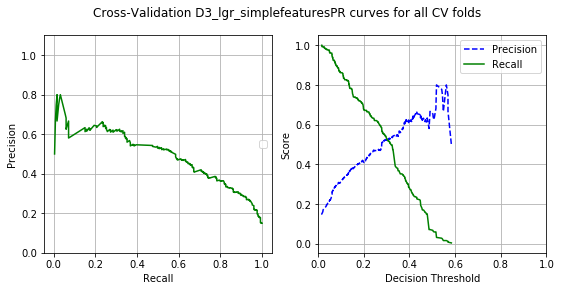

In [95]:
meval = ModelCVEvaluation(grid_search.best_estimator_, 'D3_lgr_simplefeatures', X_trainT, y_train, 6)

No handles with labels found to put in legend.


INPUT DATA
FEATURES:36
TRAINING SAMPLES: 2222
CLASS 1 PROPORTION: 0.13
CV RESULTS
average_precision
TRAIN MEAN (std):  0.763 ( 0.030 )
VALID MEAN (std):  0.567 ( 0.079 )
DIFF BETWEEN MEAN:  0.197
briers_score_loss
TRAIN MEAN (std):  0.072 ( 0.005 )
VALID MEAN (std):  0.086 ( 0.029 )
DIFF BETWEEN MEAN:  -0.014


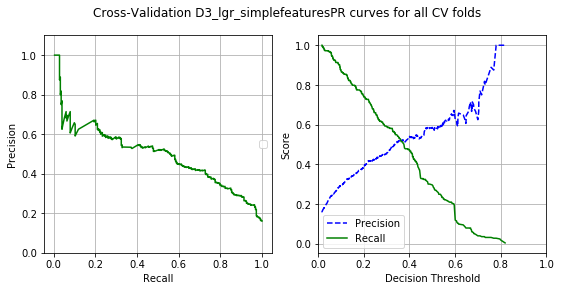

In [79]:
meval = ModelCVEvaluation(grid_search.best_estimator_, 'D3_lgr_simplefeatures', X_trainT, y_train, 6)

No handles with labels found to put in legend.


INPUT DATA
FEATURES:36
TRAINING SAMPLES: 2222
CLASS 1 PROPORTION: 0.13
CV RESULTS
average_precision
TRAIN MEAN (std):  0.705 ( 0.039 )
VALID MEAN (std):  0.593 ( 0.067 )
DIFF BETWEEN MEAN:  0.112
briers_score_loss
TRAIN MEAN (std):  0.074 ( 0.006 )
VALID MEAN (std):  0.100 ( 0.043 )
DIFF BETWEEN MEAN:  -0.026


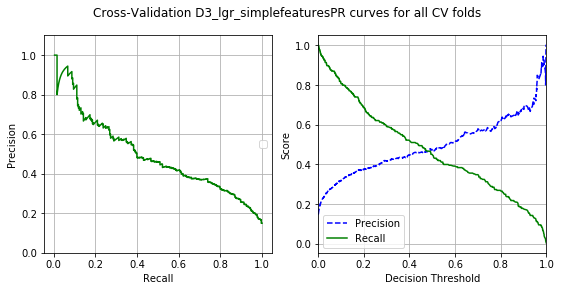

In [32]:
meval = ModelCVEvaluation(grid_search.best_estimator_, 'D3_lgr_simplefeatures', X_trainT, y_train, 6)

Find params most useful

In [24]:
names = X_train.columns
coefs = grid_search.best_estimator_.coef_[0]
coefs_dict = dict(zip(names, coefs))
coefs = pd.DataFrame(coefs_dict,index=['coef']).T
coefs.sort_values('coef')

,coef
EDMORNwait_time_std,-1.950738
IPMORNocc_patients_elec,-1.362879
week_sin,-0.950546
EDMORNage_mean,-0.796138
EDDAILYno_admissions,-0.453936
IPMORNocc_patients_total,-0.372838
EDMORNocc_majors,-0.370918
IPDAILYno_patients_daycase,-0.357133
IPMORNocc_patients_elecnonelec_gp,-0.338180
week_cos,-0.221950


No handles with labels found to put in legend.


INPUT DATA
FEATURES:39
TRAINING SAMPLES: 2222
CLASS 1 PROPORTION: 0.13
CV RESULTS
average_precision
TRAIN MEAN (std):  0.701 ( 0.040 )
VALID MEAN (std):  0.614 ( 0.088 )
DIFF BETWEEN MEAN:  0.088
briers_score_loss
TRAIN MEAN (std):  0.075 ( 0.006 )
VALID MEAN (std):  0.099 ( 0.037 )
DIFF BETWEEN MEAN:  -0.025


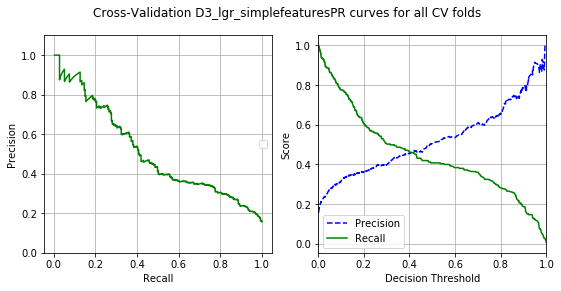

In [22]:
meval = ModelCVEvaluation(grid_search.best_estimator_, 'D3_lgr_simplefeatures', X_trainT, y_train, 6)

No handles with labels found to put in legend.


INPUT DATA
FEATURES:39
TRAINING SAMPLES: 2222
CLASS 1 PROPORTION: 0.13
CV RESULTS
average_precision
TRAIN MEAN (std):  0.666 ( 0.032 )
VALID MEAN (std):  0.618 ( 0.085 )
DIFF BETWEEN MEAN:  0.049
briers_score_loss
TRAIN MEAN (std):  0.121 ( 0.012 )
VALID MEAN (std):  0.137 ( 0.082 )
DIFF BETWEEN MEAN:  -0.016


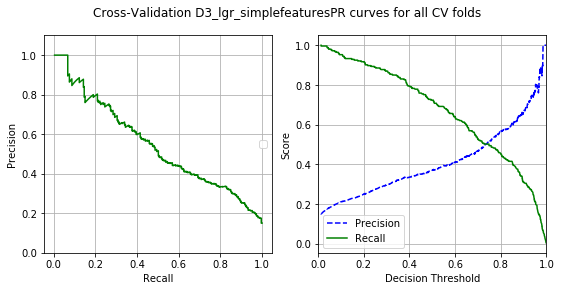

In [22]:
meval = ModelCVEvaluation(grid_search.best_estimator_, 'D3_lgr_simplefeatures', X_trainT, y_train, 6)

Look at each fold of Timseries:

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


--------------------
fold1
VALIDATION SAMPLES: 317
CLASS 1 PROPORTION: 0.22
--------------------
fold2
VALIDATION SAMPLES: 317
CLASS 1 PROPORTION: 0.09
--------------------
fold3
VALIDATION SAMPLES: 317
CLASS 1 PROPORTION: 0.16
--------------------
fold4
VALIDATION SAMPLES: 317
CLASS 1 PROPORTION: 0.06
--------------------
fold5
VALIDATION SAMPLES: 317
CLASS 1 PROPORTION: 0.12
--------------------
fold6
VALIDATION SAMPLES: 317
CLASS 1 PROPORTION: 0.15


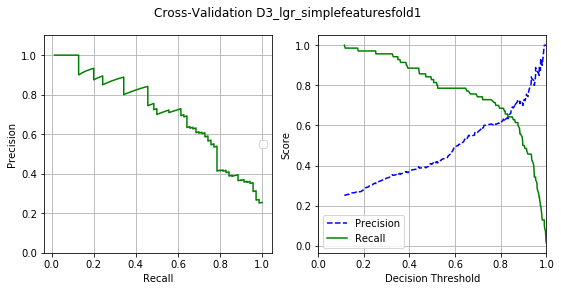

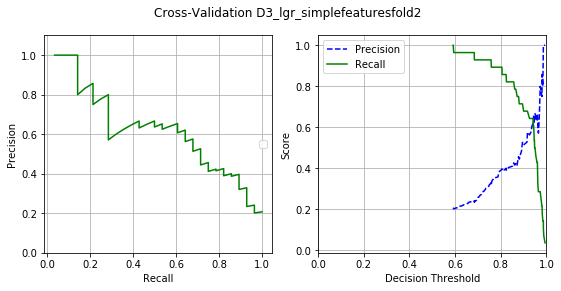

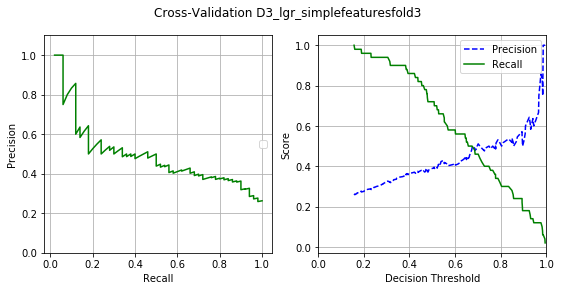

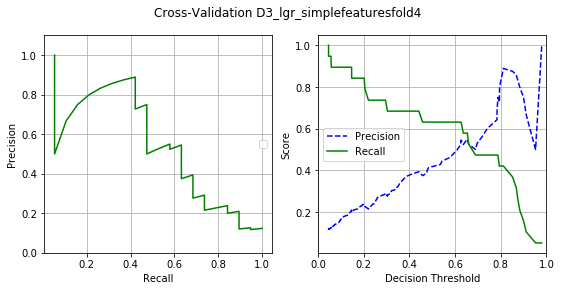

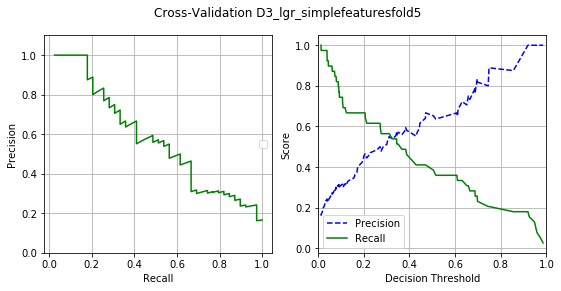

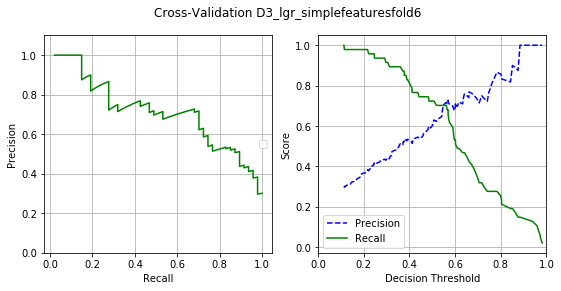

In [23]:
meval.plot_PR_curve_each_valid_set()

Save model evaluation to pickle.

In [24]:
import pickle
filename = '../../../data/output/SimpleModelLGR_Allvars.pkl'

outfile = open(filename,'wb')
pickle.dump(meval,outfile)
outfile.close()